In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

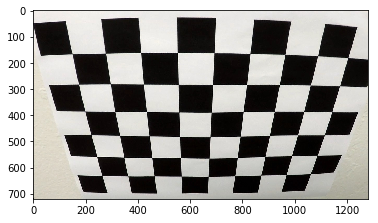

In [3]:
img = mpimg.imread("camera_cal/calibration2.jpg")
plt.imshow(img)

In [4]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

In [5]:
objp

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 2.,  0.,  0.],
       [ 3.,  0.,  0.],
       [ 4.,  0.,  0.],
       [ 5.,  0.,  0.],
       [ 6.,  0.,  0.],
       [ 7.,  0.,  0.],
       [ 8.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  1.,  0.],
       [ 2.,  1.,  0.],
       [ 3.,  1.,  0.],
       [ 4.,  1.,  0.],
       [ 5.,  1.,  0.],
       [ 6.,  1.,  0.],
       [ 7.,  1.,  0.],
       [ 8.,  1.,  0.],
       [ 0.,  2.,  0.],
       [ 1.,  2.,  0.],
       [ 2.,  2.,  0.],
       [ 3.,  2.,  0.],
       [ 4.,  2.,  0.],
       [ 5.,  2.,  0.],
       [ 6.,  2.,  0.],
       [ 7.,  2.,  0.],
       [ 8.,  2.,  0.],
       [ 0.,  3.,  0.],
       [ 1.,  3.,  0.],
       [ 2.,  3.,  0.],
       [ 3.,  3.,  0.],
       [ 4.,  3.,  0.],
       [ 5.,  3.,  0.],
       [ 6.,  3.,  0.],
       [ 7.,  3.,  0.],
       [ 8.,  3.,  0.],
       [ 0.,  4.,  0.],
       [ 1.,  4.,  0.],
       [ 2.,  4.,  0.],
       [ 3.,  4.,  0.],
       [ 4.,  4.,  0.],
       [ 5.,  4.

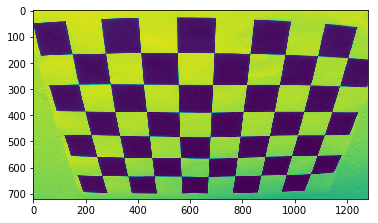

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [7]:
ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

In [8]:
corners.shape

(54, 1, 2)

In [9]:
corners[7]

array([[ 1087.65527344,   174.77708435]], dtype=float32)

In [10]:
objpoints=[]

In [11]:
imgpoints=[]

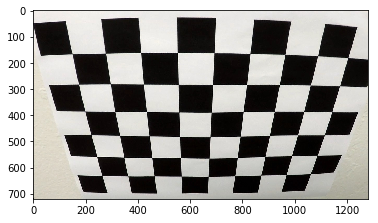

In [12]:
plt.imshow(img)

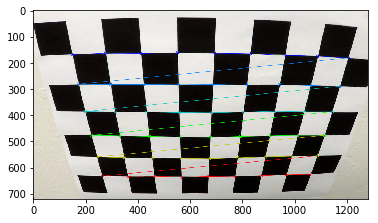

In [13]:
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    cv2.drawChessboardCorners(img, (9,6), corners, ret)
    plt.imshow(img)

In [14]:
import glob
images = glob.glob("camera_cal/calibration*.jpg")

In [15]:
objpoints=[]
imgpoints=[]
for image in images:
    img = mpimg.imread(image)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        #cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #plt.imshow(img)

In [16]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

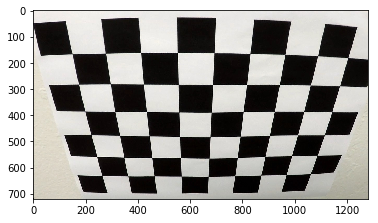

In [17]:
img = mpimg.imread("camera_cal/calibration2.jpg")
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(img)

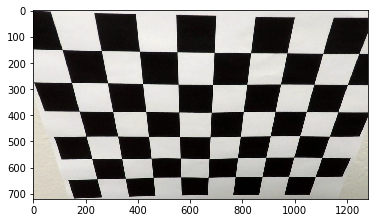

In [18]:
plt.imshow(dst)

In [19]:
mtx

array([[  1.15158804e+03,   0.00000000e+00,   6.66167057e+02],
       [  0.00000000e+00,   1.14506859e+03,   3.86440204e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [20]:
dist

array([[ -2.35510339e-01,  -7.90388401e-02,  -1.28492203e-03,
          8.25970403e-05,   7.22743173e-02]])

In [21]:
import pickle

In [29]:
pickle.dump({'mtx': mtx, 'dist':dist}, open('cam_cali.p','wb'))

In [30]:
dict = pickle.load(open('cam_cali.p','rb'))

In [31]:
dict['mtx']

array([[  1.15158804e+03,   0.00000000e+00,   6.66167057e+02],
       [  0.00000000e+00,   1.14506859e+03,   3.86440204e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [33]:
dict['dist']

array([[ -2.35510339e-01,  -7.90388401e-02,  -1.28492203e-03,
          8.25970403e-05,   7.22743173e-02]])

In [ ]:
def cam_cali(images):
    pickle_file = 'cam_cali.p'
    if os.path.isfile(pickle_file):
        return pickle.load(open(pickle_file,'rb'))
    objpoints=[]
    imgpoints=[]
    for image in images:
        img = mpimg.imread(image)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dict = {'mtx': mtx, 'dist':dist}
    pickle.dump(dict, open('cam_cali.p','wb'))
    return dict

In [1]:
img = mpimg.imread("camera_cal/calibration2.jpg")
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.imshow(img)

NameError: name 'mpimg' is not defined

In [29]:
for image in images:
    img = mpimg.imread(image)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    dist_file ='output_images/undist_' + image.split('/')[1].split('.')[0] + '.jpg'
    mpimg.imsave(dist_file, dst)

In [26]:
'undist_' + 'camera_cal/calibration2.jpg'.split('/')[1].split('.')[0]

'undist_calibration2'

In [30]:
mtx, dist

(array([[  1.15158804e+03,   0.00000000e+00,   6.66167057e+02],
        [  0.00000000e+00,   1.14506859e+03,   3.86440204e+02],
        [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]]),
 array([[ -2.35510339e-01,  -7.90388401e-02,  -1.28492203e-03,
           8.25970403e-05,   7.22743173e-02]]))

In [3]:
# imageio.plugins.ffmpeg.download()
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

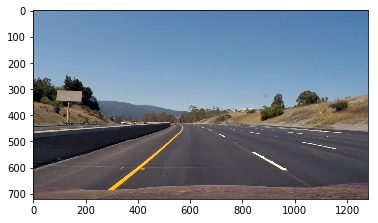

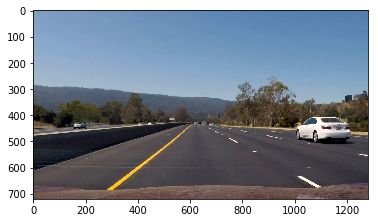

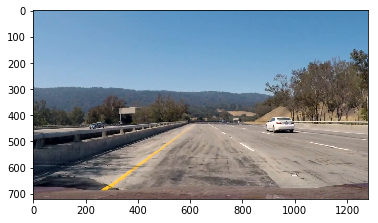

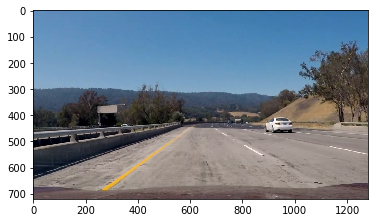

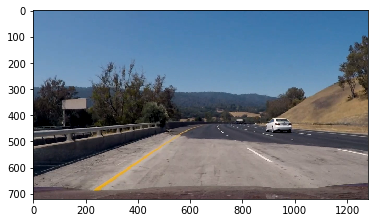

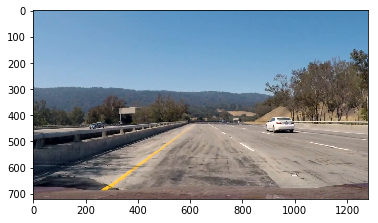

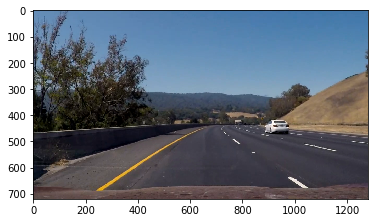

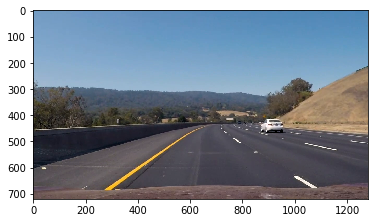

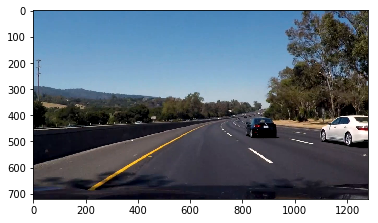

In [13]:
project_clip = VideoFileClip("project_video.mp4")
samples = ['00:00:03.1','00:00:12.1','00:00:22.2','00:00:23.2','00:00:24.2','00:00:22.2','00:00:25.1','00:00:26.1','00:00:42.1']
frames = [project_clip.get_frame(sample) for sample in samples]

for frame in frames:
    plt.figure()
    plt.imshow(frame)
#clip = project_clip.subclip(50,60)

In [62]:
region_v = [[(150,670),(600, 435), (650, 435), (1200,670)]]

In [63]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

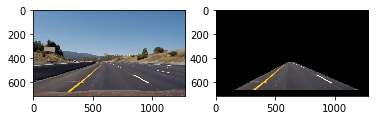

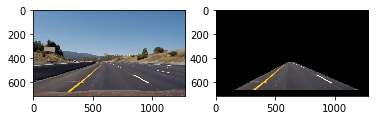

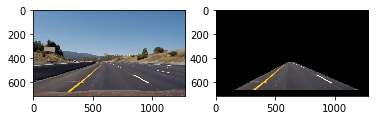

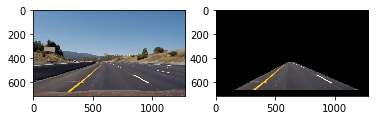

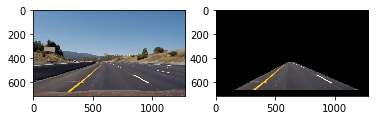

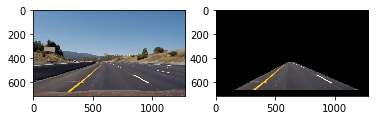

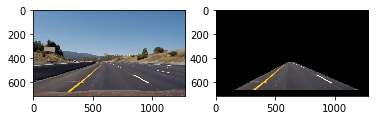

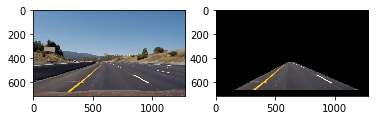

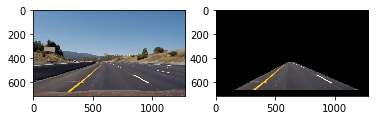

In [64]:
vertices = np.array(region_v, dtype=np.int32)
for frame in frames:
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(frames[0])
    plt.subplot(1,2,2)
    plt.imshow(region_of_interest(frames[0], vertices))

In [83]:
def s_grad(img, plot_flag=False):
    # Convert to HLS color space and separate the S channel
    # Note: img is the undistorted image
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    
    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    thresh_min = 40
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    # Threshold color channel
    s_thresh_min = 170
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    
    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    
    # Plotting thresholded images
    if plot_flag:
        plt.figure()
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
        ax1.set_title('Stacked thresholds')
        ax1.imshow(color_binary)
        
        ax2.set_title('Combined S channel and gradient thresholds')
        ax2.imshow(combined_binary, cmap='gray')
    return combined_binary

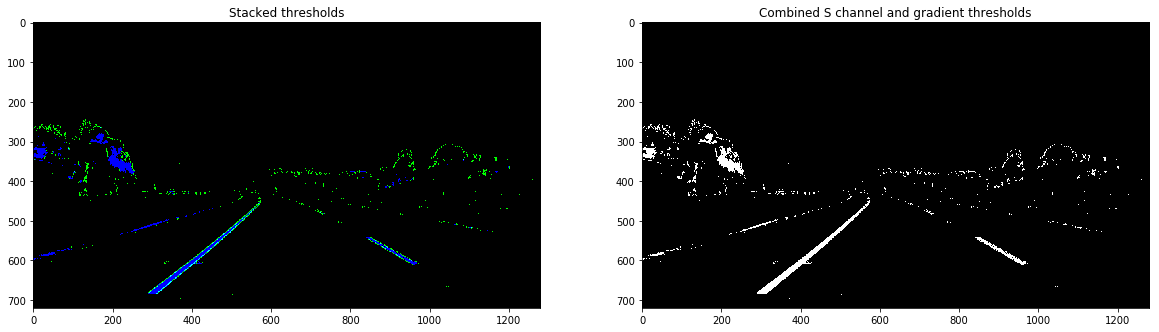

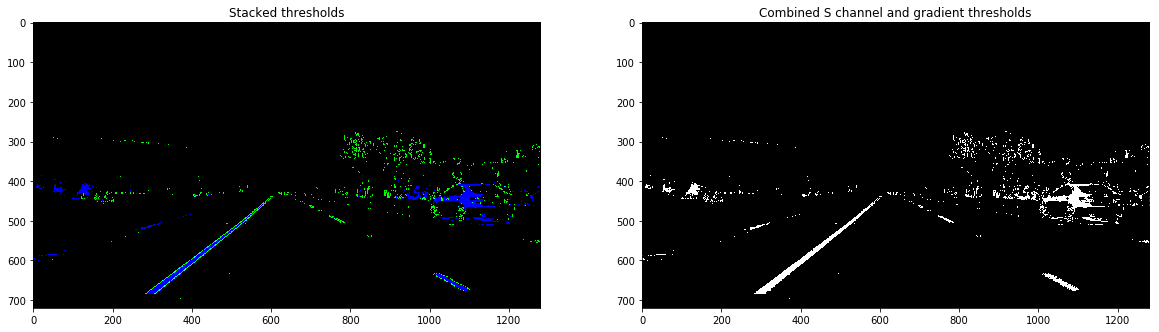

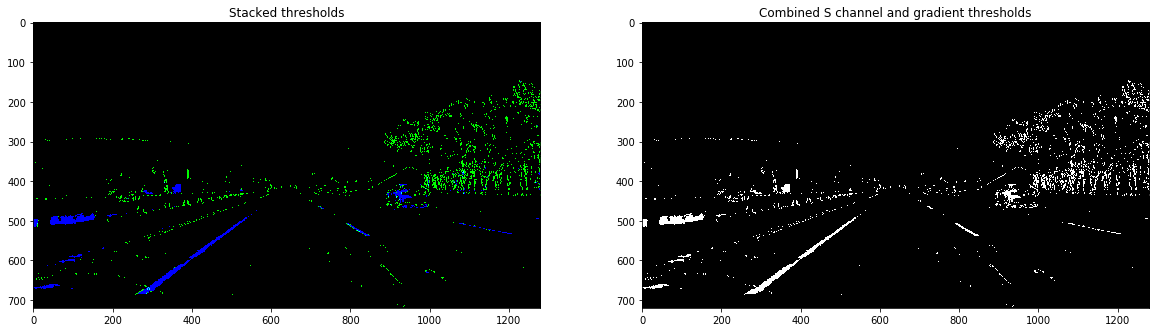

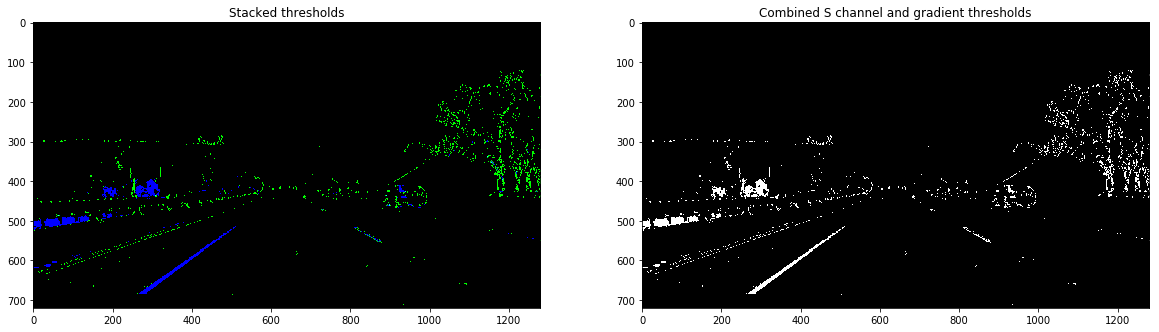

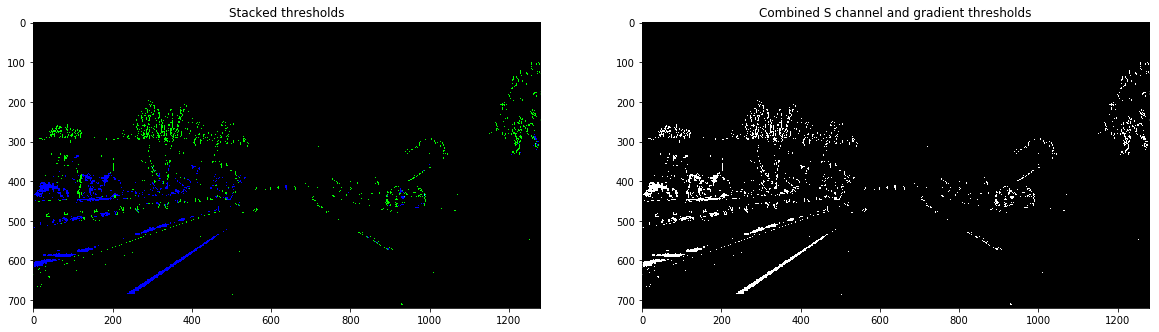

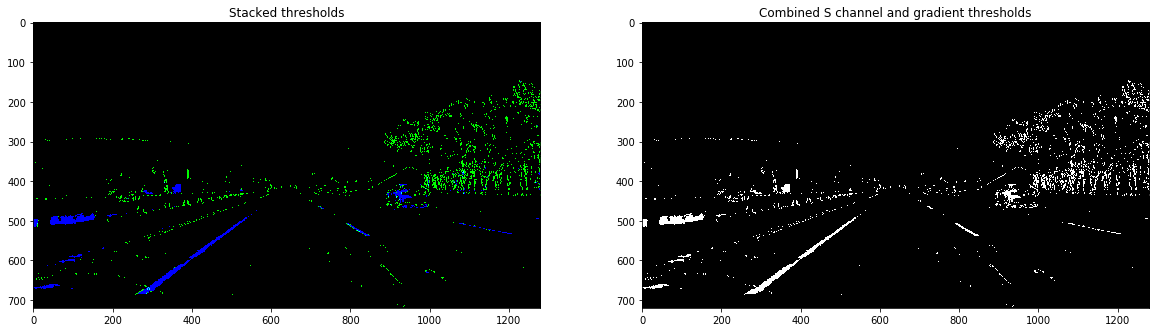

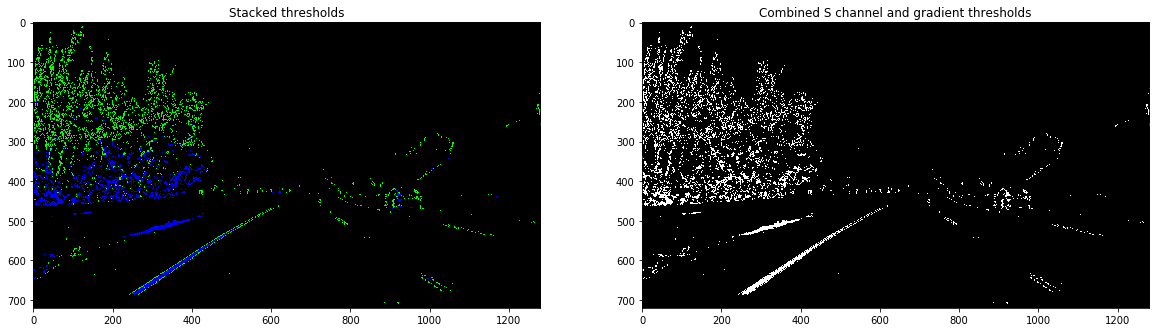

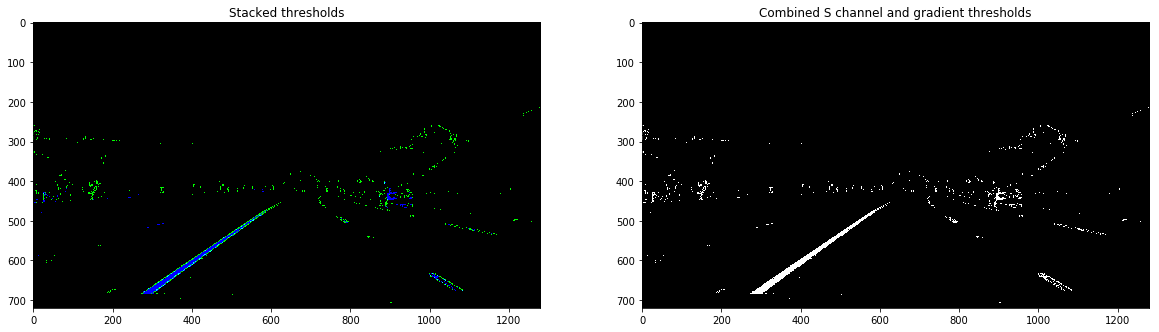

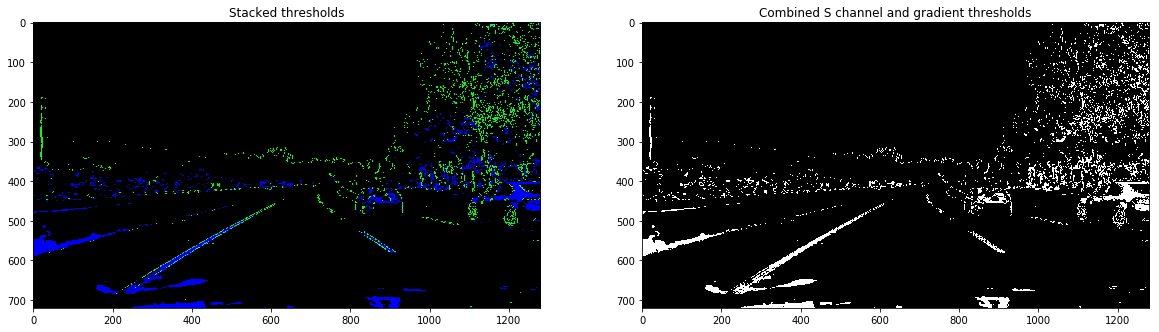

In [84]:
for frame in frames:
    s_grad(frame)